# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | harstad
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | vuktyl
Processing Record 8 of Set 1 | resplendor
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | naracoorte
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | ulsteinvik
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | puerto santa
Processing Record 21 of Set 1 | papatowai

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  port-aux-francais -49.3500   70.2167    279.52        91          97   
1            harstad  68.7990   16.5293    268.38        77          44   
2     puerto natales -51.7236  -72.4875    287.40        44          40   
3          adamstown -25.0660 -130.1015    298.42        83         100   
4         isafjordur  66.0755  -23.1240    271.59        84          99   

   Wind Speed Country        Date  
0       14.00      TF  1739552964  
1        4.47      NO  1739553199  
2        9.26      CL  1739553200  
3        9.85      PN  1739553201  
4        3.74      IS  1739553202

In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0        port-aux-francais -49.3500   70.2167    279.52        91          97   
1                  harstad  68.7990   16.5293    268.38        77          44   
2           puerto natales -51.7236  -72.4875    287.40        44          40   
3                adamstown -25.0660 -130.1015    298.42        83         100   
4               isafjordur  66.0755  -23.1240    271.59        84          99   

         Wind Speed Country        Date  
City_ID                                  
0             14.00      TF  1739552964  
1              4.47      NO  1739553199  
2              9.26      CL  1739553200  
3              9.85      PN  1739553201  
4              3.74      IS  1739553202

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

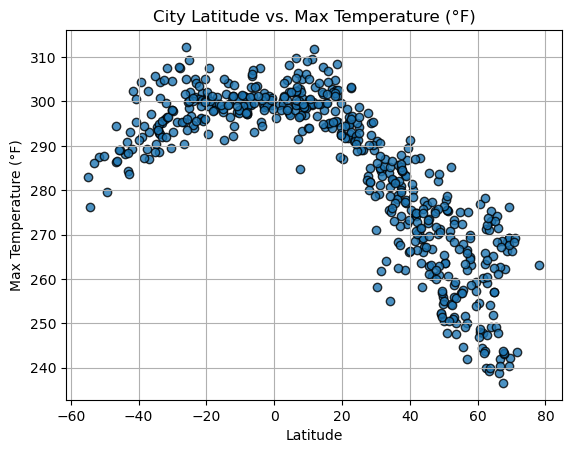

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

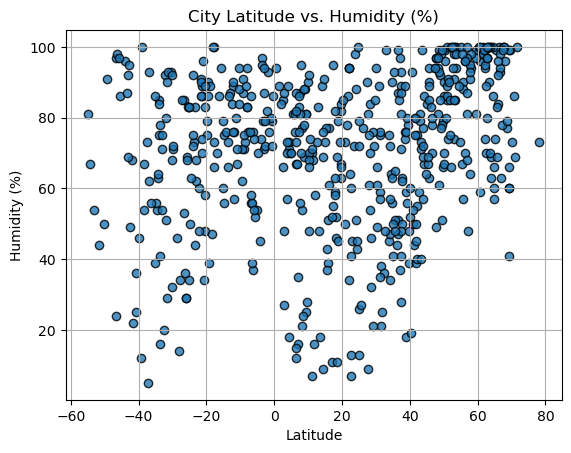

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

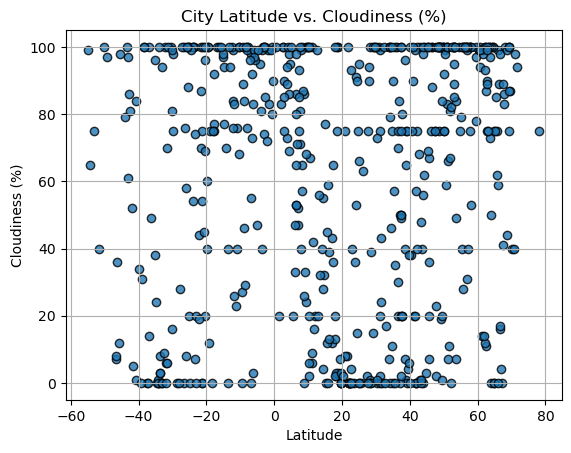

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

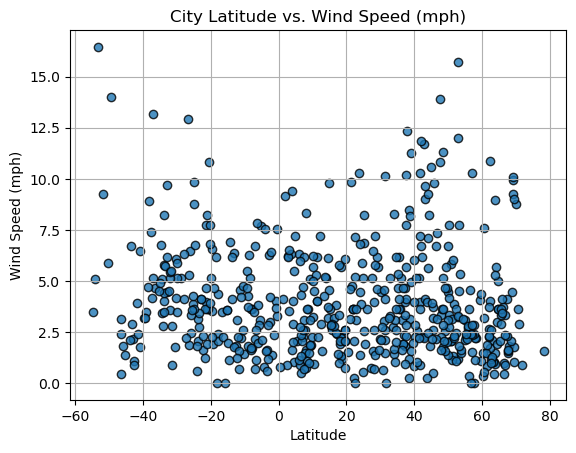

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
1           harstad  68.7990   16.5293    268.38        77          44   
4        isafjordur  66.0755  -23.1240    271.59        84          99   
5            vuktyl  63.8567   57.3094    249.28       100          50   
7            albany  42.6001  -73.9662    270.56        59          68   
10            tiksi  71.6872  128.8694    243.62       100          94   

         Wind Speed Country        Date  
City_ID                                  
1              4.47      NO  1739553199  
4              3.74      IS  1739553202  
5              1.49      RU  1739553004  
7              2.24      US  1739553160  
10             0.88      RU  1739553210

In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
0        port-aux-francais -49.3500   70.2167    279.52        91          97   
2           puerto natales -51.7236  -72.4875    287.40        44          40   
3                adamstown -25.0660 -130.1015    298.42        83         100   
6               resplendor -19.3256  -41.2553    307.54        39          12   
8               naracoorte -36.9579  140.7383    287.00        62         100   

         Wind Speed Country        Date  
City_ID                                  
0             14.00      TF  1739552964  
2              9.26      CL  1739553200  
3              9.85      PN  1739553201  
6              1.91      BR  1739553206  
8              5.12      AU  1739553208

###  Temperature vs. Latitude Linear Regression Plot

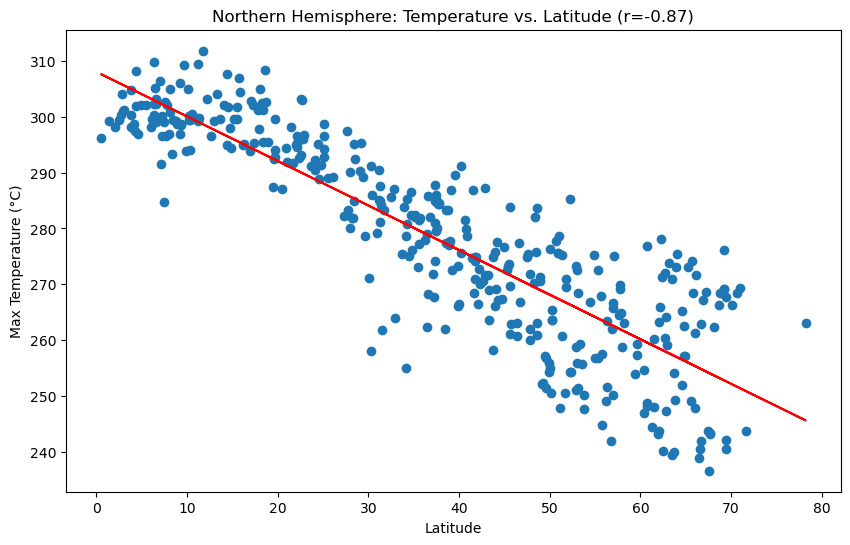

In [25]:
# Northern hemisphere

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
 
# Linear Regression for Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], 
                                                        northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
 
plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 0), fontsize=15, color="red")
plt.title(f"Northern Hemisphere: Temperature vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.savefig("output_data/north_regression.png")
plt.show()

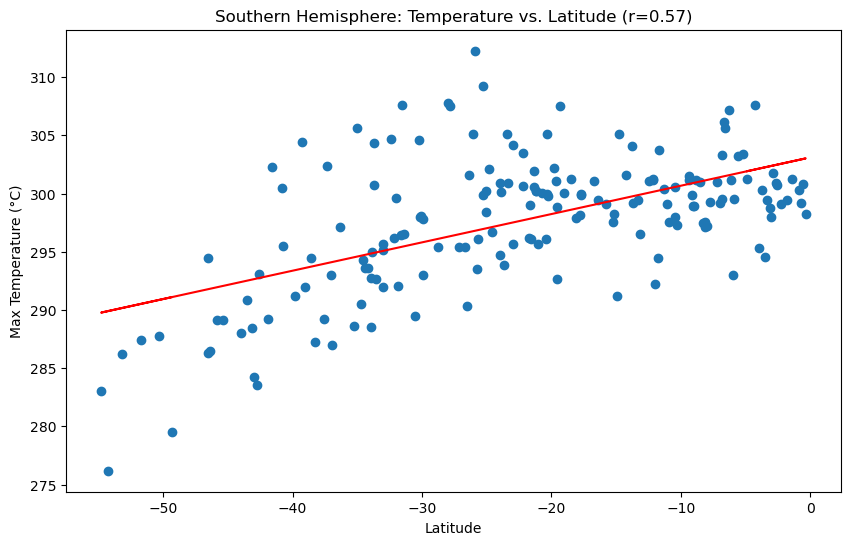

In [26]:
# Southern hemisphere

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear Regression for Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"],
                                                        southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
 
plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-45, 0), fontsize=15, color="red")
plt.title(f"Southern Hemisphere: Temperature vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.savefig("output_data/south_regression.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

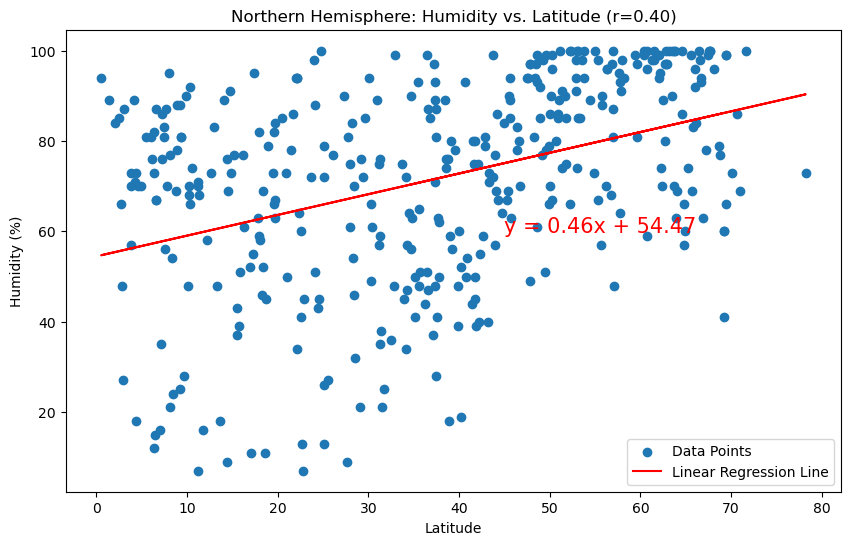

In [29]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear Regression for Northern Hemisphere Humidity vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], 
                                                        northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], label='Data Points')
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (45, min(regress_values) + 5), fontsize=15, color="red")
plt.title(f"Northern Hemisphere: Humidity vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.savefig("output_data/north_humidity_lat_regression.png")
plt.show()

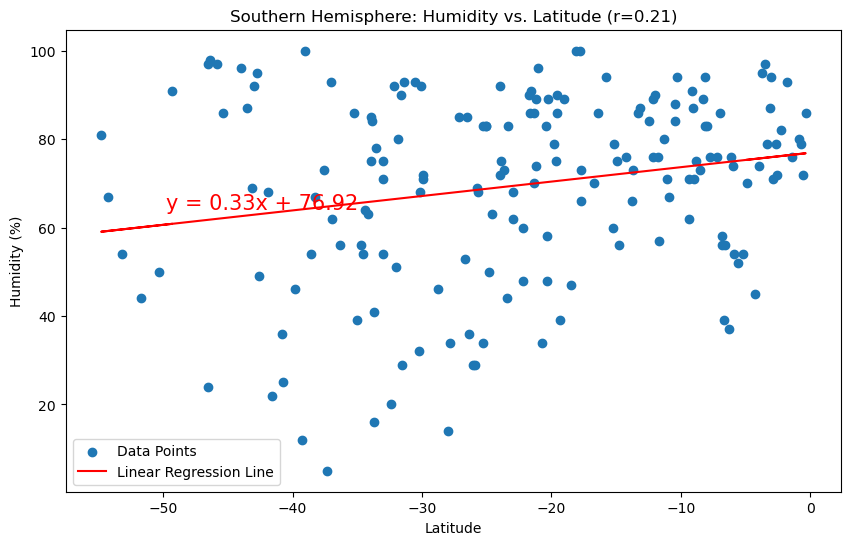

In [30]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear Regression for Southern Hemisphere Humidity vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], 
                                                        southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], label='Data Points')
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]) + 5, min(regress_values) + 5), fontsize=15, color="red")
plt.title(f"Southern Hemisphere: Humidity vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.savefig("output_data/south_humidity_lat_regression.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

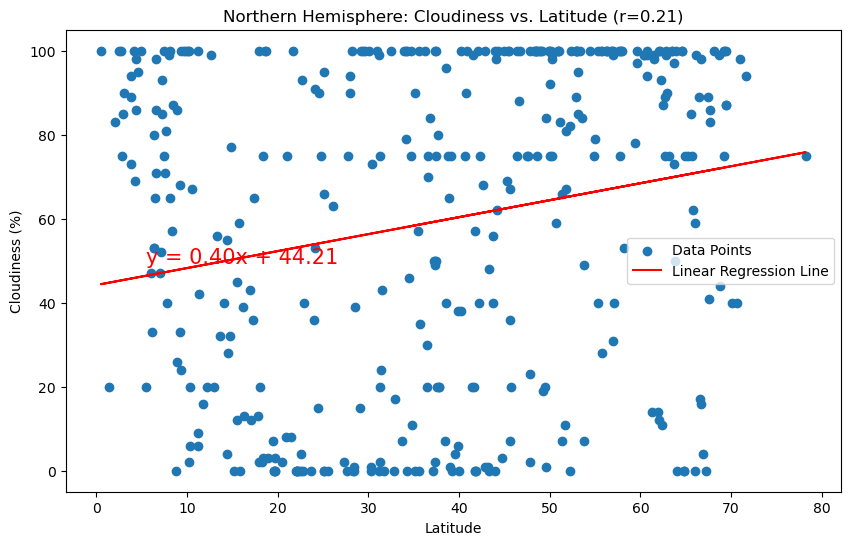

In [33]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear Regression for Northern Hemisphere Cloudiness vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], 
                                                        northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], label='Data Points')
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]) + 5, min(regress_values) + 5), fontsize=15, color="red")
plt.title(f"Northern Hemisphere: Cloudiness vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.savefig("output_data/north_cloudiness_lat_regression.png")
plt.show()

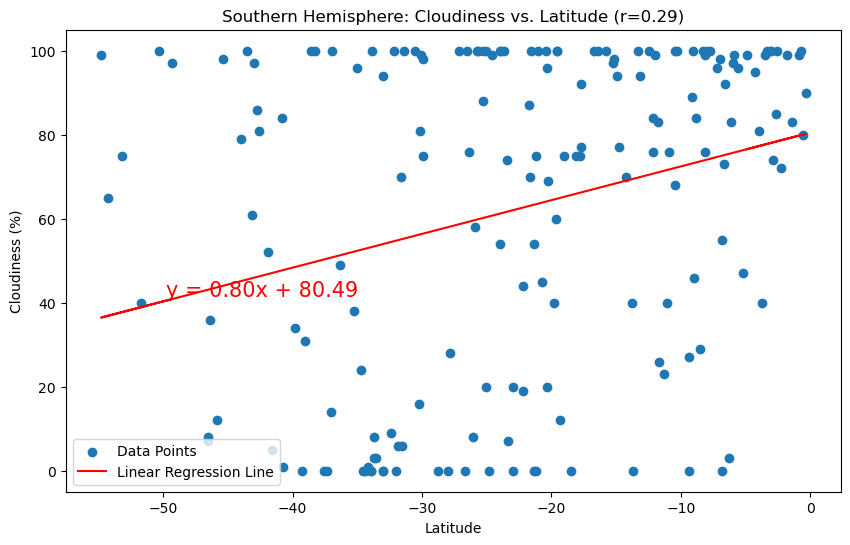

In [34]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear Regression for Southern Hemisphere Cloudiness vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], 
                                                        southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], label='Data Points')
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]) + 5, min(regress_values) + 5), fontsize=15, color="red")
plt.title(f"Southern Hemisphere: Cloudiness vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.savefig("output_data/south_cloudiness_lat_regression.png")
plt.show()

**Discussion about the linear relationship:** 

# Northern Hemisphere
In this graph, the r^2 value is very close to zero, indicating a weak relationship and showing that the independent variable (i.e. latitude) may not 
be relevant in explaining or predicting cloudiness in the Northern Hemisphere. This weak relationship could explain several phenomena such as poor data 
quality, incorrect data entries or missing valaues.

# Southern Hemisphere
In this graph, the r^2-value is 0.018616831531634456, again indicating a very weak relationship between latitude and cloudiness which is the 
dependent variable. This weak relationship does not provide a statistically sufficient explanation of the relationship between latitude and 
cloudiness in the Southern Hemisphere. To show a strong relationship and hence provide a statistically strong linear relationship between these two
    variables - latitude and cloudiness - as shown in this graph, the data must be assessed and cleaned up for all errors and inaccuracies. 

### Wind Speed vs. Latitude Linear Regression Plot

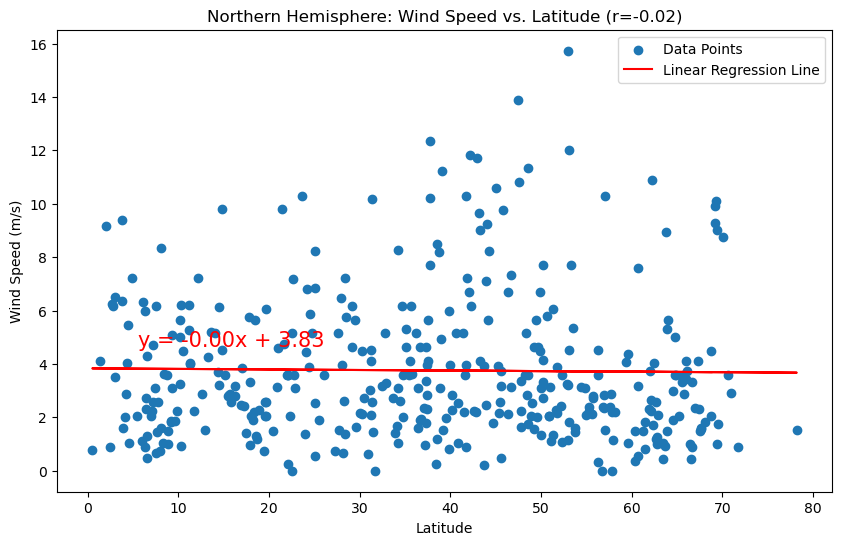

In [37]:
# Filter for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Linear Regression for Northern Hemisphere Wind Speed vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], 
                                                        northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], label='Data Points')
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]) + 5, min(regress_values) + 1), fontsize=15, color="red")
plt.title(f"Northern Hemisphere: Wind Speed vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.savefig("output_data/north_wind_speed_lat_regression.png")
plt.show()

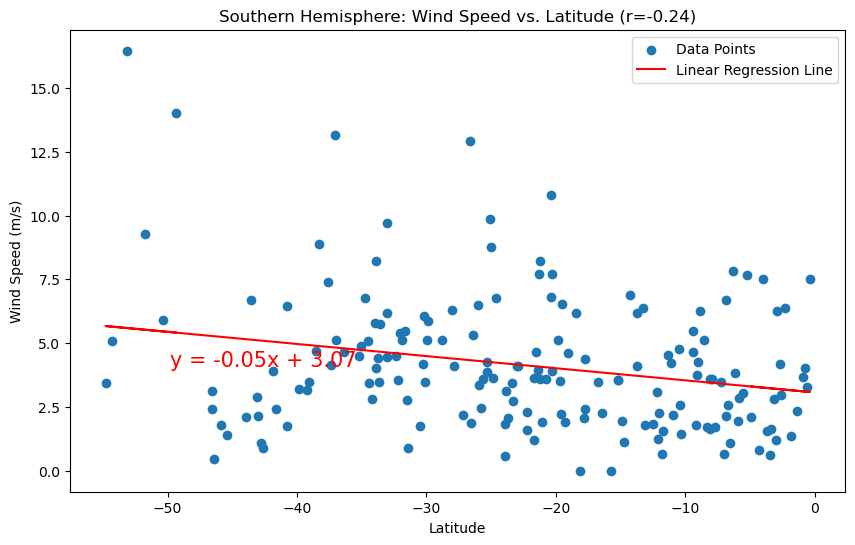

In [38]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Linear Regression for Southern Hemisphere Wind Speed vs. Latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], 
                                                        southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], label='Data Points')
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]) + 5, min(regress_values) + 1), fontsize=15, color="red")
plt.title(f"Southern Hemisphere: Wind Speed vs. Latitude (r={r_value:.2f})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.savefig("output_data/south_wind_speed_lat_regression.png")
plt.show()

**Discussion about the linear relationship:** 

# Northern Hemisphere
Here, the r^2-value is 0.0017236249523139959, which is very low and shows a weak relationship between latitude and windspeed. With this model,
this relationship is just too weak and irrelevant for predicting a statistically sound relationship between the independent and dependent variables,
which in this case are the latitude and windspeed.

# Southern Hemisphere
Here, again, the relationship between latitude and windspeed is weak. This graph or linear relationship is not strong enough to give a statistically
convincing explation of how latitude, the independent variable, influence wind speed which the independent variable. However, it should be noted that 
r^2-value is 0.06495869418886388, while showing a weak relationship, is statistically more significant than the values in the previous graphs 
showing linear relationship between the independent and dependent variables. 

In [40]:
In summary, all the graphs plotted above show a linear relationship between the variables. However the relationship is so weak and cannot be used
to provide any statistically sound explanation between the independent and dependent variable. 

SyntaxError: invalid syntax (1591798707.py, line 1)